Saving crashed car.jpg to crashed car.jpg


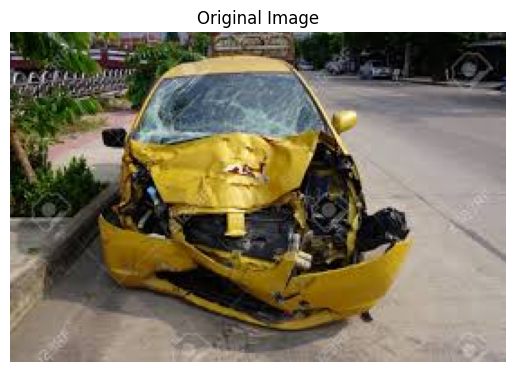

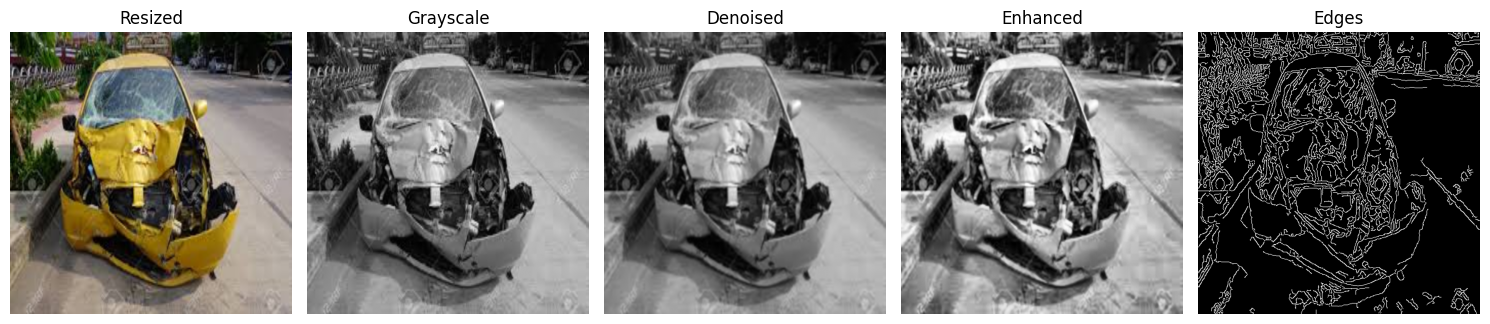

In [1]:
#Damaged Car Image Preprocessing Pipeline for Computer Vision using OpenCV
!pip install opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Load the image
for filename in uploaded.keys():
    img_path = filename

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()
def preprocess_car_image(img):
    # Resize
    resized = cv2.resize(img, (512, 512))

    # Convert to Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)

    # Denoise
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)

    # Edge Detection
    edges = cv2.Canny(enhanced, 50, 150)

    return resized, gray, denoised, enhanced, edges
resized, gray, denoised, enhanced, edges = preprocess_car_image(image)

# Plot results
titles = ['Resized', 'Grayscale', 'Denoised', 'Enhanced', 'Edges']
images = [resized, gray, denoised, enhanced, edges]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


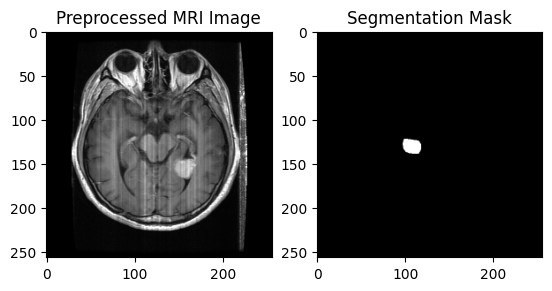

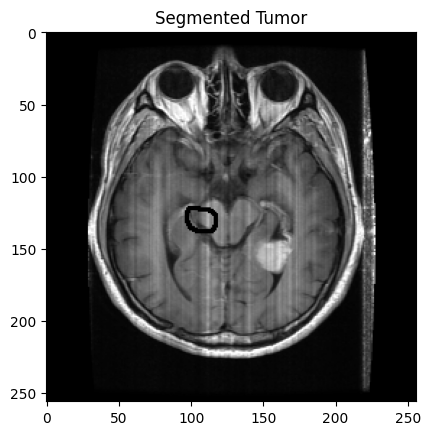

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_15[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 128, 128,  │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_17[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_4[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_19[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_5[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_21[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │  1,179,904 │ up_sampling2d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64, 64,    │          0 │ conv2d_24[0][0],  │
│ (Concatenate)       │ 512)              │            │ conv2d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 128, 128,  │          0 │ concatenate_3[0]

 Total params: 7,376,321 (28.14 MB)

 Trainable params: 7,376,321 (28.14 MB)

 Non-trainable params: 0 (0.00 B)

Saving 97.png to 97.png


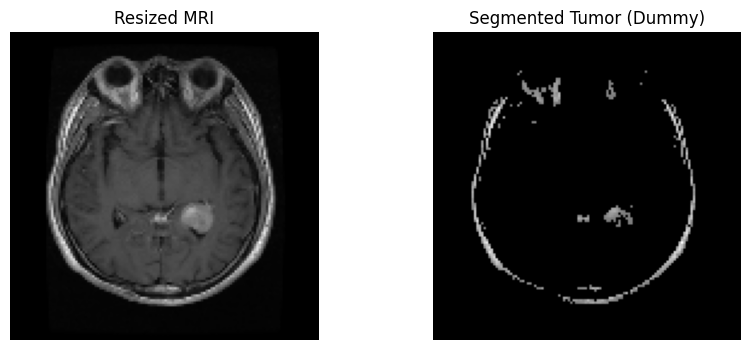

In [6]:
#Brain Tumor Segmentation using Computer Vision
!pip install opencv-python-headless streamlit scikit-learn matplotlib tensorflow --quiet
import cv2
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Load MRI image and mask
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# Normalize image intensity
def normalize_image(image):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(image)

# Resize image to fixed dimensions
def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

# Example to preprocess an image
image_path = '/content/sample_data/96.png'
mask_path = '/content/sample_data/95.png'

mri_image = load_image(image_path)
mask_image = load_image(mask_path)

mri_image = resize_image(mri_image)
mask_image = resize_image(mask_image)

mri_image = normalize_image(mri_image)

# Visualizing the preprocessed image and mask
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Preprocessed MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title("Segmentation Mask")
plt.show()
# Tumor segmentation using thresholding and contours
def segment_tumor(image, mask):
    # Thresholding to get binary image
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours to identify tumor boundaries
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the MRI image
    segmented_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

    return segmented_image

segmented_image = segment_tumor(mri_image, mask_image)

# Visualize the result
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Tumor")
plt.show()
import tensorflow as tf
from tensorflow.keras import layers, models

# Define U-Net Model
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Contracting path (Encoder)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck (Middle Layer)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Expansive path (Decoder)
    u1 = layers.UpSampling2D((2, 2))(c4)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    concat1 = layers.concatenate([c5, c3], axis=-1)  # Match shapes

    u2 = layers.UpSampling2D((2, 2))(concat1)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    concat2 = layers.concatenate([c6, c2], axis=-1)  # Match shapes

    u3 = layers.UpSampling2D((2, 2))(concat2)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    concat3 = layers.concatenate([c7, c1], axis=-1)  # Match shapes

    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(concat3)

    model = models.Model(inputs, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize and train the model
model = unet_model()
model.summary()
import cv2
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Upload image file manually
uploaded = files.upload()

# Load the uploaded image
for fname in uploaded.keys():
    image = Image.open(fname).convert("L")  # Convert to grayscale
    image = np.array(image)

# Resize function
def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size)

# Dummy segmentation function
def segment_tumor(image):
    _, mask = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
    segmented = cv2.bitwise_and(image, mask)
    return segmented

# Resize and segment
resized = resize_image(image)
segmented = segment_tumor(resized)

# Show results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Resized MRI")
plt.imshow(resized, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Tumor (Dummy)")
plt.imshow(segmented, cmap='gray')
plt.axis("off")

plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 866.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Saving number plate.jpg to number plate.jpg


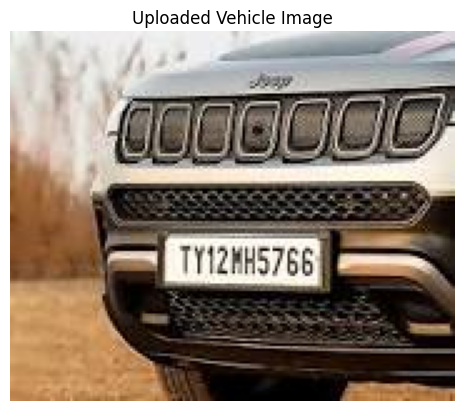

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

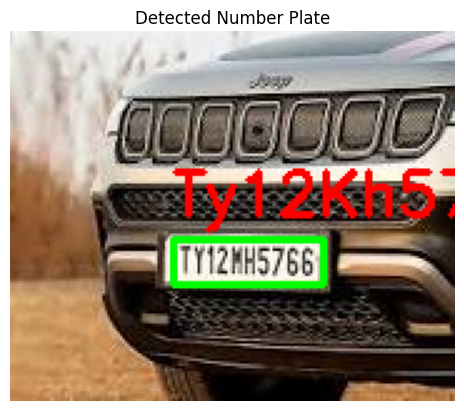

Detected Number Plate Text: Ty12Kh5766


In [7]:
#Number Plate Detection of Vehicles
!pip install easyocr opencv-python-headless
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
for fn in uploaded.keys():
    image_path = fn
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Vehicle Image")
plt.show()
reader = easyocr.Reader(['en'])
results = reader.readtext(image)

# Draw bounding boxes and text
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Show result
plt.imshow(image)
plt.axis('off')
plt.title("Detected Number Plate")
plt.show()

# Show detected text
if results:
    print("Detected Number Plate Text:", results[0][1])
else:
    print("No number plate detected.")

